In [105]:
import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

1.13.1


In [107]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [189]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [190]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.8867 - acc: 0.8808
Epoch 2/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5753 - acc: 0.9126
Epoch 3/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5004 - acc: 0.9236


In [191]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.4691 - acc: 0.9287
0.46911352486610414 0.9287


# Using own images for prediction

2


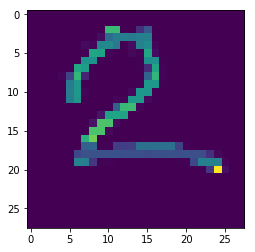

0


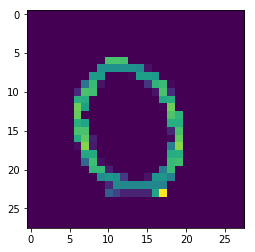

1


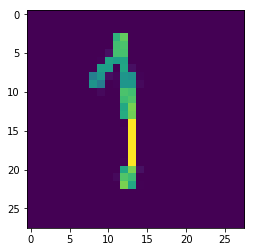

1


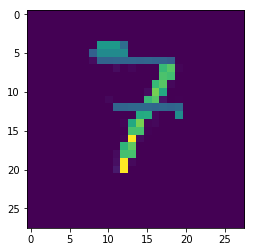

2


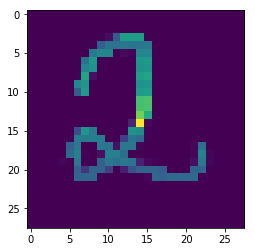

In [195]:
# add nicer plot here

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

images = [cv.imread(file, 0) for file in glob.glob('*.jpeg')]

for img in images:
    res = cv.resize(img,(28,28))
    normalized = tf.keras.utils.normalize(res,axis=1)
    prediction = model.predict([[normalized]])
    print(np.argmax(prediction))
    plt.imshow(normalized)
    plt.show()

# Using MNIST test images

7


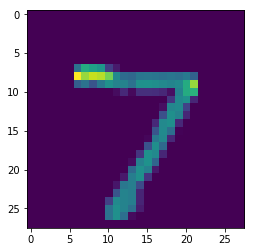

2


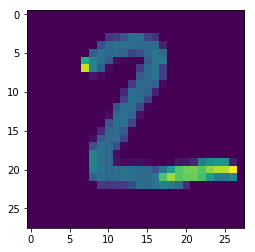

1


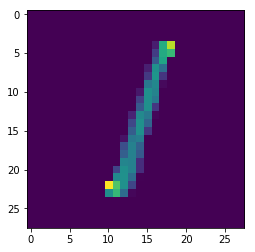

0


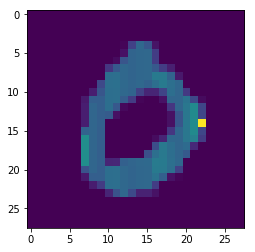

4


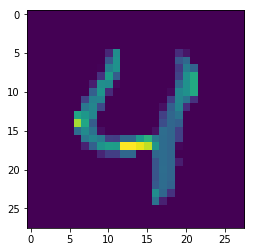

1


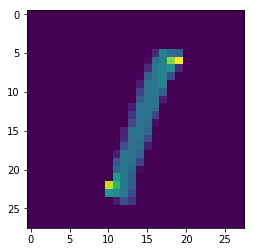

4


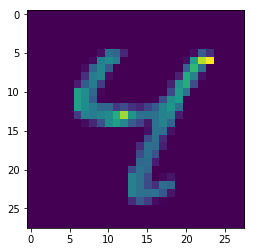

9


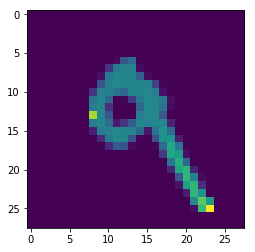

6


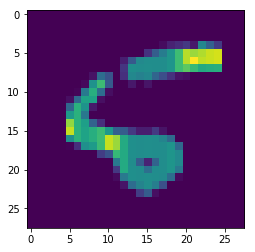

9


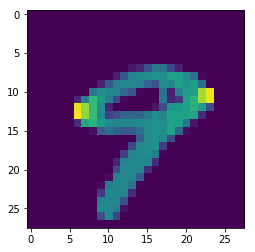

In [193]:
predictions = model.predict([x_test])

for i in range(10):
    print(np.argmax(predictions[i]))
    plt.imshow(x_test[i])
    plt.show()